In [51]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import astropy.units as u
import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

data_dir_CEA = os.path.abspath(
    "/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_ld_removed")

search_criterium = "continuum"
#sufix = "_ld_removed"

data_list_CEA = sorted(glob.glob(os.path.join(data_dir_CEA, "*"+search_criterium+"*")))

In [52]:
data_list_CEA[0]

'/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_ld_removed/hmi.sharp_cea_720s.3481.20131208_111200_TAI.continuum_ld_removed.fits'

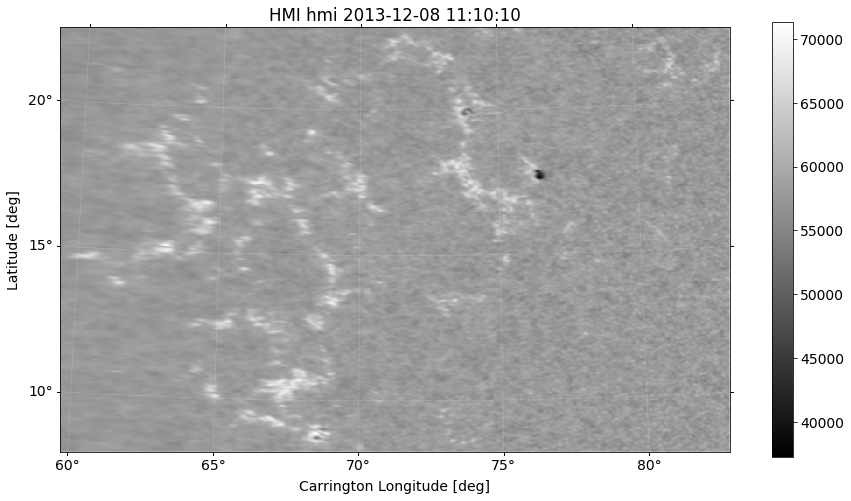

37273.29313372869

In [63]:
sp = sunpy.map.Map(data_list_CEA[0])
sp.peek()
sp.data.shape
sp.data.min()

In [97]:
#LOL YOU HAVE TO DO THIS ACTUALLY
new_dimension = u.Quantity([sp.meta["naxis1"]*2, sp.meta["naxis2"]*2], u.pixel)

#Then just resample map
new_map = sp.resample(new_dimension,method='spline')
#nearest, linear, spline return 0 on edges but neighbor returns "normal" data
#anyhow, i recommend spline, nothing will be near edges anyhow, and we will normalize it with histogram
#import numpy.ma as ma
#print(np.argwhere(new_map.data == 0).shape)
print(new_map.data.shape)
#plt.zlim([30000])
#new_map.peek()
#new_map.save

#new_map.meta["NAXIS1"] *=2
#new_map.meta["NAXIS2"] *=2

new_map.meta

(972, 1532)


MetaDict([('simple', True),
          ('bitpix', -64),
          ('naxis', 2),
          ('naxis1', 766),
          ('naxis2', 486),
          ('date', '2018-05-08T08:06:24'),
          ('date_s', '2013-12-12T20:58:05Z'),
          ('date_b', '2015-03-22T00:01:23Z'),
          ('date-obs', '2013-12-08T11:10:10.10'),
          ('t_obs', '2013.12.08_11:11:53_TAI'),
          ('t_rec', '2013.12.08_11:12:00_TAI'),
          ('trecepoc', '1993.01.01_00:00:00_TAI'),
          ('trecstep', 720.0),
          ('trecunit', 'secs'),
          ('cadence', 720.0),
          ('usflux', 2.286221e+19),
          ('meangam', 12.184),
          ('meangbt', 63.227),
          ('meangbz', 63.702),
          ('meangbh', 23.878),
          ('meanjzd', 2.94370604),
          ('totusjz', 33513290000.0),
          ('meanalp', 0.08405785),
          ('meanjzh', 0.01724697),
          ('totusjh', 1.326),
          ('absnjzh', 0.673),
          ('savncpp', 58602780000.0),
          ('meanpot', 131.4952),
        

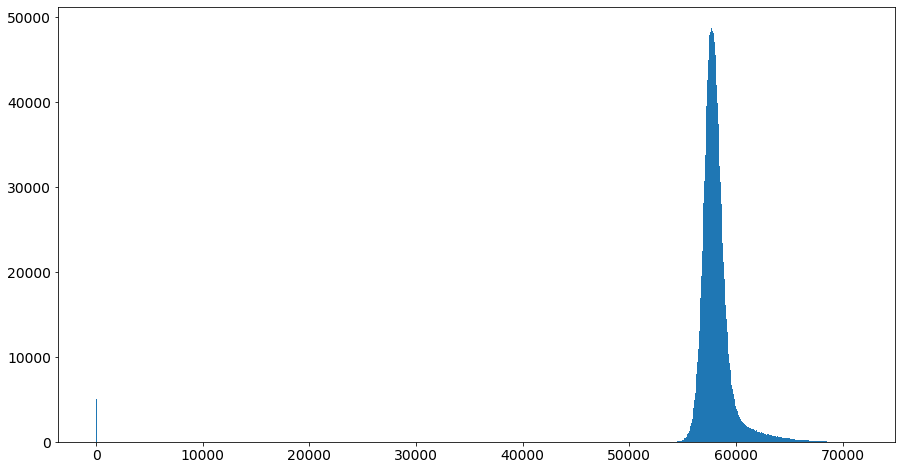

In [87]:
#Lets plot histograms of flux data between corrected and uncorrected data
plt.figure(1)
#plt.xlim([-10,1000])
plt.hist(new_map.data.flatten(), bins=1000)
plt.show()

#THIS IS SUPER FUN!

#https://docs.sunpy.org/en/stable/generated/gallery/plotting/Finding_Local_Peaks_in_Solar_Data.html

#playing around with 3d projections
#new_map.data.shape
#sp.data.min()
#sp.data.max()
#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(111, projection='3d')
#X, Y = all_pixel_indices_from_map(new_map)
#ax.plot_surface(X, Y, new_map.data)
#ax.view_init(elev=35, azim=90)